In [1]:
#practice9_1

In [2]:
import numpy as np
import tensorflow as tf

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
tf.set_random_seed(777)
learning_rate = 0.1

In [4]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

In [5]:
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [6]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

In [7]:
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

In [8]:
W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [9]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [10]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                X: x_data, Y: y_data}), sess.run([W1, W2]))
            
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                      feed_dict={X: x_data, Y: y_data})
    print("Hypothesis: ", h)
    print("Correct: ", c)
    print("Accuracy: ", a)

0 0.7539022 [array([[ 0.7988674 ,  0.6801188 ],
       [-1.2198634 , -0.30361032]], dtype=float32), array([[ 1.3752297 ],
       [-0.78823847]], dtype=float32)]
100 0.69584423 [array([[ 0.671669  ,  0.71368533],
       [-1.2917174 , -0.24467792]], dtype=float32), array([[ 1.1212678 ],
       [-0.90971726]], dtype=float32)]
200 0.694039 [array([[ 0.64527303,  0.7046098 ],
       [-1.318939  , -0.22392061]], dtype=float32), array([[ 1.0992552],
       [-0.895172 ]], dtype=float32)]
300 0.6924366 [array([[ 0.645278  ,  0.69601005],
       [-1.3529738 , -0.20636196]], dtype=float32), array([[ 1.090277 ],
       [-0.8809228]], dtype=float32)]
400 0.6908046 [array([[ 0.6665332 ,  0.6891592 ],
       [-1.3948005 , -0.19111179]], dtype=float32), array([[ 1.0908597 ],
       [-0.86969215]], dtype=float32)]
500 0.6889793 [array([[ 0.7063529 ,  0.6843806 ],
       [-1.4450662 , -0.17811841]], dtype=float32), array([[ 1.1021909 ],
       [-0.86151755]], dtype=float32)]
600 0.68681204 [array([[ 0.7

5500 0.037264757 [array([[ 5.7244945,  5.336118 ],
       [-5.814636 , -5.0084014]], dtype=float32), array([[ 8.315342],
       [-7.72601 ]], dtype=float32)]
5600 0.035966218 [array([[ 5.7448063,  5.3671665],
       [-5.835913 , -5.0404897]], dtype=float32), array([[ 8.377787],
       [-7.793771]], dtype=float32)]
5700 0.03475129 [array([[ 5.764405 ,  5.39702  ],
       [-5.8564777, -5.0713267]], dtype=float32), array([[ 8.438415],
       [-7.859348]], dtype=float32)]
5800 0.03361243 [array([[ 5.7833366,  5.4257593],
       [-5.876374 , -5.1009974]], dtype=float32), array([[ 8.497322 ],
       [-7.9228725]], dtype=float32)]
5900 0.032542817 [array([[ 5.801642 ,  5.4534564],
       [-5.8956375, -5.129578 ]], dtype=float32), array([[ 8.554606 ],
       [-7.9844666]], dtype=float32)]
6000 0.031536564 [array([[ 5.819358 ,  5.4801764],
       [-5.914306 , -5.1571383]], dtype=float32), array([[ 8.610341],
       [-8.044239]], dtype=float32)]
6100 0.030588254 [array([[ 5.836518,  5.505981],
 

In [12]:
#practice9_2

In [13]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
tf.set_random_seed(777)

In [15]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [17]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [18]:
W1 = tf.get_variable("W1", shape=[784, 512],
                    initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[512, 512],
                    initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[512, 512],
                    initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[512, 512],
                    initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[512, 10],
                    initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

In [19]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [20]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [21]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
print('Learning Finished!')

Epoch: 0001 cost = 0.315003238
Epoch: 0002 cost = 0.103676012
Epoch: 0003 cost = 0.069611966
Epoch: 0004 cost = 0.050808097
Epoch: 0005 cost = 0.038271351
Epoch: 0006 cost = 0.035270665
Epoch: 0007 cost = 0.032025996
Epoch: 0008 cost = 0.024121415
Epoch: 0009 cost = 0.024366730
Epoch: 0010 cost = 0.020516458
Epoch: 0011 cost = 0.021180982
Epoch: 0012 cost = 0.014988296
Epoch: 0013 cost = 0.017498998
Epoch: 0014 cost = 0.015888847
Epoch: 0015 cost = 0.016418472
Learning Finished!


In [22]:
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.9748


Label:  [9]
Prediction:  [5]


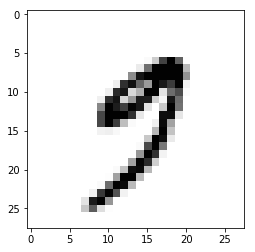

In [23]:
r = np.random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
plt.show()

In [24]:
#practice9_3
tf.reset_default_graph ()

In [25]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [26]:
tf.set_random_seed(777)

In [27]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [28]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [29]:
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

In [30]:
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev = 0.01))
                 
L1 = tf.nn.conv2d(X_img, W1, strides = [1, 1, 1, 1], padding = 'SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')

In [31]:
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev = 0.01))
                 
L2 = tf.nn.conv2d(L1, W2, strides = [1, 1, 1, 1], padding = 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])

In [32]:
W3 = tf.get_variable("W3", shape = [7 * 7 * 64, 10], initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

In [33]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

In [34]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [35]:
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 0001 cost = 0.345595875
Epoch: 0002 cost = 0.091787756
Epoch: 0003 cost = 0.068287600
Epoch: 0004 cost = 0.056504838
Epoch: 0005 cost = 0.046986474
Epoch: 0006 cost = 0.040973744
Epoch: 0007 cost = 0.036622457
Epoch: 0008 cost = 0.032798450
Epoch: 0009 cost = 0.027992232
Epoch: 0010 cost = 0.024833299
Epoch: 0011 cost = 0.022272548
Epoch: 0012 cost = 0.020419940
Epoch: 0013 cost = 0.017038902
Epoch: 0014 cost = 0.015615687
Epoch: 0015 cost = 0.013097098
Learning Finished!


In [36]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict = {X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.9886


Label:  [7]
Prediction:  [7]


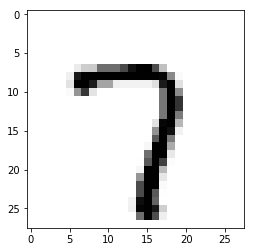

In [37]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict = {X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
plt.show()